# Copula-based conformal bounding box prediction

In [1]:
from src.reporting import UQEvalResults, SummaryReporter, GifReporter

/home/lab/bcyusamu/miniconda3/envs/TBD/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Uncertainty quantification results

In [2]:
folds, version = 3, "_release", #10
approaches = ['Bonferroni',
              'Max additive',
              "Independent DE-CCP",
              "Gumbel DE-CCP",
              'Empirical DE-CCP']
epsilons = [0.01, 0.05, 0.1, 0.2]
detectors = ['Correlated D.', 'Uncorrelated D.', 'YOLOv8 D.']
filename = f"results/UQ_experiments{version}.pkl"
res = UQEvalResults()
res.load(filename)

### Validity

>> Reporting validity ...


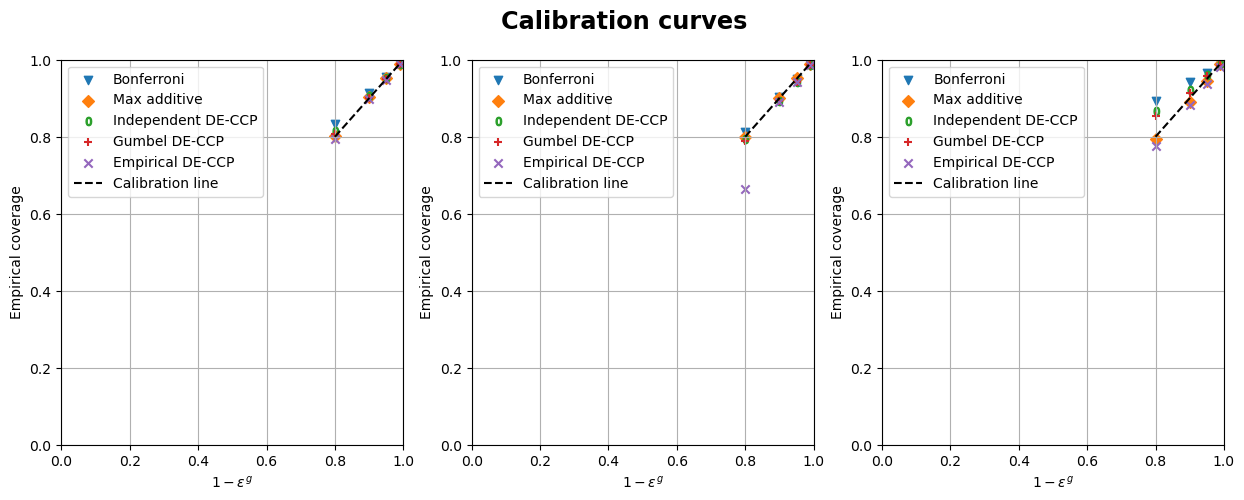

In [3]:
validity_tbls = SummaryReporter(epsilons, approaches, detectors, k_folds=folds).report(res)

In [4]:
validity_tbls[0] # Experiment N°1: correlated dissimilarities

$1 - \epsilon^g$   Bonferroni Max additive Independent DE-CCP  \
0              0.99  0.992±0.002  0.989±0.003        0.990±0.001   
1              0.95  0.955±0.004  0.952±0.004        0.952±0.004   
2              0.90  0.913±0.008  0.902±0.002        0.906±0.007   
3              0.80  0.832±0.006  0.802±0.002        0.815±0.008   

  Gumbel DE-CCP Empirical DE-CCP  
0   0.990±0.002      0.989±0.002  
1   0.949±0.004      0.947±0.006  
2   0.901±0.006      0.897±0.011  
3   0.806±0.009      0.795±0.010

In [5]:
validity_tbls[1] # Experiment N°2: independent dissimilarities

$1 - \epsilon^g$   Bonferroni Max additive Independent DE-CCP  \
0              0.99  0.989±0.002  0.990±0.001        0.987±0.002   
1              0.95  0.949±0.002  0.952±0.000        0.943±0.000   
2              0.90  0.903±0.004  0.901±0.003        0.893±0.003   
3              0.80  0.811±0.005  0.798±0.005        0.795±0.004   

  Gumbel DE-CCP Empirical DE-CCP  
0   0.986±0.003      0.986±0.002  
1   0.943±0.000      0.941±0.001  
2   0.893±0.002      0.890±0.003  
3   0.788±0.009      0.665±0.181

In [6]:
validity_tbls[2] # Experiment N°3: YOLOv8's dissimilarities

$1 - \epsilon^g$   Bonferroni Max additive Independent DE-CCP  \
0              0.99  0.992±0.003  0.990±0.003        0.988±0.001   
1              0.95  0.965±0.007  0.944±0.009        0.961±0.006   
2              0.90  0.943±0.009  0.889±0.021        0.922±0.017   
3              0.80  0.893±0.014  0.795±0.024        0.868±0.022   

  Gumbel DE-CCP Empirical DE-CCP  
0   0.987±0.003      0.981±0.004  
1   0.957±0.008      0.937±0.010  
2   0.913±0.018      0.882±0.025  
3   0.854±0.032      0.776±0.023

### Efficiency

>> Reporting efficiency ...


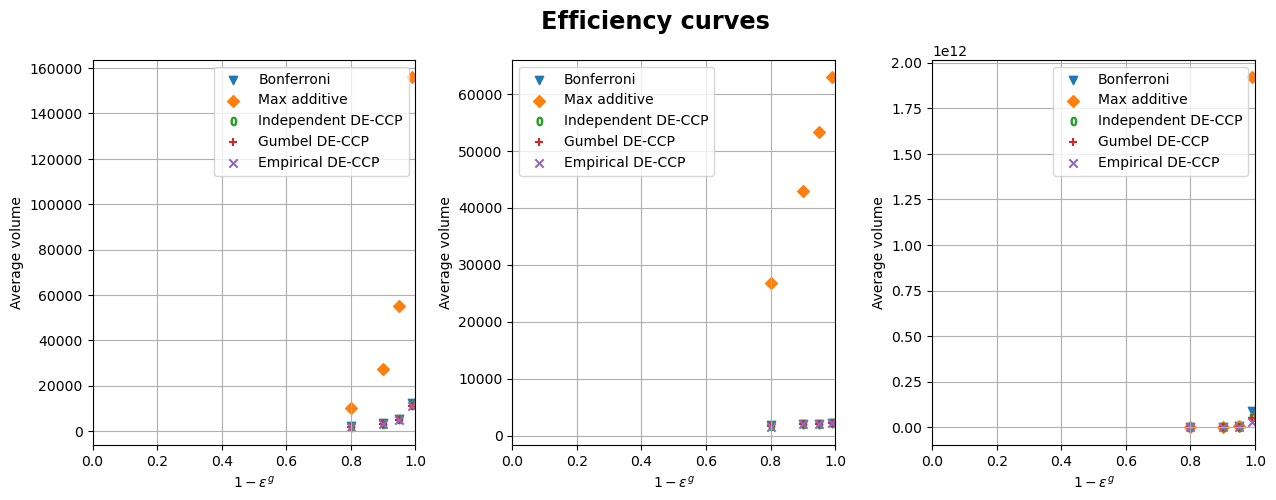

In [7]:
efficiency_tbls = SummaryReporter(epsilons, approaches, detectors, k_folds=folds, summarize_validity=False).report(res)

In [8]:
efficiency_tbls[0] # Experiment N°1: correlated dissimilarities

$1 - \epsilon^g$         Bonferroni       Max additive Independent DE-CCP  \
0              0.99  1.24e+04±9.50e+02  1.56e+05±2.38e+04  1.15e+04±6.75e+02   
1              0.95  5.34e+03±2.05e+02  5.53e+04±3.38e+03  5.15e+03±2.46e+02   
2              0.90  3.40e+03±1.36e+02  2.73e+04±7.77e+02  3.22e+03±8.89e+01   
3              0.80  1.98e+03±3.69e+01  1.00e+04±1.35e+02  1.81e+03±4.52e+01   

       Gumbel DE-CCP   Empirical DE-CCP  
0  1.12e+04±7.20e+02  1.11e+04±8.15e+02  
1  4.97e+03±2.28e+02  4.87e+03±2.40e+02  
2  3.10e+03±7.91e+01  2.99e+03±1.09e+02  
3  1.72e+03±4.56e+01  1.62e+03±5.00e+01

In [9]:
efficiency_tbls[1] # Experiment N°2: independent dissimilarities

$1 - \epsilon^g$         Bonferroni       Max additive Independent DE-CCP  \
0              0.99  2.22e+03±3.14e+00  6.29e+04±3.18e+02  2.21e+03±5.30e+00   
1              0.95  2.13e+03±4.52e+00  5.33e+04±4.51e+02  2.11e+03±3.16e+00   
2              0.90  2.02e+03±6.73e+00  4.29e+04±3.76e+02  2.00e+03±3.35e+00   
3              0.80  1.81e+03±7.62e+00  2.68e+04±6.45e+01  1.77e+03±8.94e+00   

       Gumbel DE-CCP   Empirical DE-CCP  
0  2.21e+03±3.76e+00  2.21e+03±4.99e+00  
1  2.11e+03±3.00e+00  2.11e+03±3.51e+00  
2  2.00e+03±3.67e+00  1.99e+03±8.02e+00  
3  1.77e+03±8.84e+00  1.48e+03±4.08e+02

In [10]:
efficiency_tbls[2] # Experiment N°3: YOLOv8's dissimilarities

$1 - \epsilon^g$         Bonferroni       Max additive Independent DE-CCP  \
0              0.99  8.99e+10±3.89e+10  1.92e+12±1.20e+12  5.62e+10±1.57e+10   
1              0.95  5.00e+09±3.22e+09  8.60e+09±5.99e+09  3.72e+09±2.52e+09   
2              0.90  9.41e+08±5.04e+08  3.99e+07±3.60e+07  4.63e+08±2.90e+08   
3              0.80  5.23e+07±2.94e+07  7.05e+05±1.95e+05  1.39e+07±1.12e+07   

       Gumbel DE-CCP   Empirical DE-CCP  
0  5.01e+10±1.66e+10  3.10e+10±1.28e+10  
1  2.52e+09±1.57e+09  6.14e+08±4.44e+08  
2  2.38e+08±1.37e+08  1.47e+07±1.19e+07  
3  4.69e+06±3.42e+06  3.57e+05±5.63e+04

## Object detection results

## Examples

In [11]:
giffer = GifReporter(dest="Max_additive_vs_Empiricial_DE-CPP.gif")
giffer.report(res, save=True)

TypeError: __init__() missing 1 required positional argument: 'num_frames'

## DELETE ME

In [12]:
[res.logs[approaches[0], det, 0, epsilons[0]]["cal_res"].shape for det in detectors]

[(3007, 16), (2756, 16), (744, 16)]

In [13]:
[res.logs[approaches[0], det, 0, epsilons[0]]["test_res"].shape for det in detectors]

[(9781, 16), (9674, 16), (2740, 16)]

In [14]:
res.logs[approaches[0], detectors[0], 0, epsilons[0]]["cal_dissims"]

object's fields          x_min       y_min       x_max       y_max
Bounds             Exact value Exact value Exact value Exact value
images     objects                                                
003376.png 0          1.200721    1.618175     0.60282    1.009003
002951.png 0          1.183542    0.131589    0.249822    0.868971
004841.png 0          1.349661    0.108609     2.74664    0.430694
           1          0.368448    0.181865    6.553336    0.226106
           2          0.251093    1.076803    0.405844    0.796615
...                        ...         ...         ...         ...
007185.png 4          0.368892    1.610726    4.355884    1.175854
           5           2.40559     2.31434    5.357407    2.114428
           6          0.600206    0.674551    0.134777    1.303734
           7          0.762522     1.00335    5.031397     0.84098
           8          0.882511    0.862197    1.890616    1.328757

[3007 rows x 4 columns]